In [2]:
import sys
import cv2
import numpy as np
import habitat
from environment import environments
from habitat.sims.habitat_simulator.actions import HabitatSimActions
from habitat.utils.visualizations import maps
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!ln -s /data/ ./data

In [5]:
config=habitat.get_config("./configs/pointnav_kozub.yaml")
config['DATASET']['DATA_PATH'] = '/data/v1/{split}/{split}.json.gz'
config['DATASET']['SCENES_DIR'] = '/data'
config['DATASET']['SPLIT'] = 'train'
env = environments.NavRLEnv\
        (
    config=config
    )
print("Environment creation successful")

2020-04-02 18:23:45,701 Initializing dataset PointNav-v1
2020-04-02 18:25:30,022 initializing sim Sim-v0
2020-04-02 18:25:34,099 Initializing task Nav-v0


Environment creation successful


In [6]:
top_down_map = maps.get_topdown_map(env.sim(), map_resolution=(250, 250))

In [7]:
env.sim().get_agent_state()

AgentState(position=array([ 1.8685926,  2.521949 , -5.230977 ], dtype=float32), rotation=quaternion(-0.565775632858276, 0, 0.824559211730957, 0), velocity=array([0., 0., 0.]), angular_velocity=array([0., 0., 0.]), force=array([0., 0., 0.]), torque=array([0., 0., 0.]), sensor_states={'rgb': SixDOFPose(position=array([ 1.8685926,  3.771949 , -5.230977 ], dtype=float32), rotation=quaternion(-0.565775632858276, 0, 0.824559211730957, 0)), 'depth': SixDOFPose(position=array([ 1.8685926,  3.771949 , -5.230977 ], dtype=float32), rotation=quaternion(-0.565775632858276, 0, 0.824559211730957, 0))})

In [8]:
def get_informative_part(_map):
    top, down, left, right = -1, -1, -1, -1
    i, j = 0, 0
    while (_map[i,:] == 0).all():
        i += 1
    top = i
    while (_map[i,:] != 0).any():
        i += 1
    down = i
    while (_map[:,j] == 0).all():
        j += 1
    left = j
    while (_map[:,j] != 0).any():
        j += 1
    right = j
    return top, down, left, right

In [9]:
def show_obs(env):
    res = env.sim().get_observations_at()
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    
    plt.subplot(1, 2, 1)
    plt.imshow(res['rgb'])
    plt.title('rgb')
    
    plt.subplot(1, 2, 2)
    plt.imshow(res['depth'][:,:,0], cmap='gray')
    plt.title('depth')
    
    plt.show()

In [10]:
def show_agent_info(env, map_size=250):
    print(env.sim().get_agent_state())
    top_down_map = maps.get_topdown_map(env.sim(), map_resolution=(map_size, map_size))

    fig, ax = plt.subplots(2, 2, figsize=(20, 20))

    plt.subplot(2, 2, 3)
    plt.imshow(top_down_map)
    plt.title('top_down_view full')

    plt.subplot(2, 2, 4)
    pos = get_informative_part(top_down_map)
    plt.imshow(top_down_map[pos[0]:pos[1], pos[2]:pos[3]])
    plt.title('top_down_view informative')

    plt.subplot(2, 2, 1)
    plt.imshow(env.sim().get_observations_at()['rgb'])
    plt.title('rgb observation')

    plt.subplot(2, 2, 2)
    plt.imshow(env.sim().get_observations_at()['depth'][:,:,0], cmap='gray')
    plt.title('depth observation')

    plt.show()

AgentState(position=array([ 1.8685926,  2.521949 , -5.230977 ], dtype=float32), rotation=quaternion(-0.565775632858276, 0, 0.824559211730957, 0), velocity=array([0., 0., 0.]), angular_velocity=array([0., 0., 0.]), force=array([0., 0., 0.]), torque=array([0., 0., 0.]), sensor_states={'rgb': SixDOFPose(position=array([ 1.8685926,  3.771949 , -5.230977 ], dtype=float32), rotation=quaternion(-0.565775632858276, 0, 0.824559211730957, 0)), 'depth': SixDOFPose(position=array([ 1.8685926,  3.771949 , -5.230977 ], dtype=float32), rotation=quaternion(-0.565775632858276, 0, 0.824559211730957, 0))})


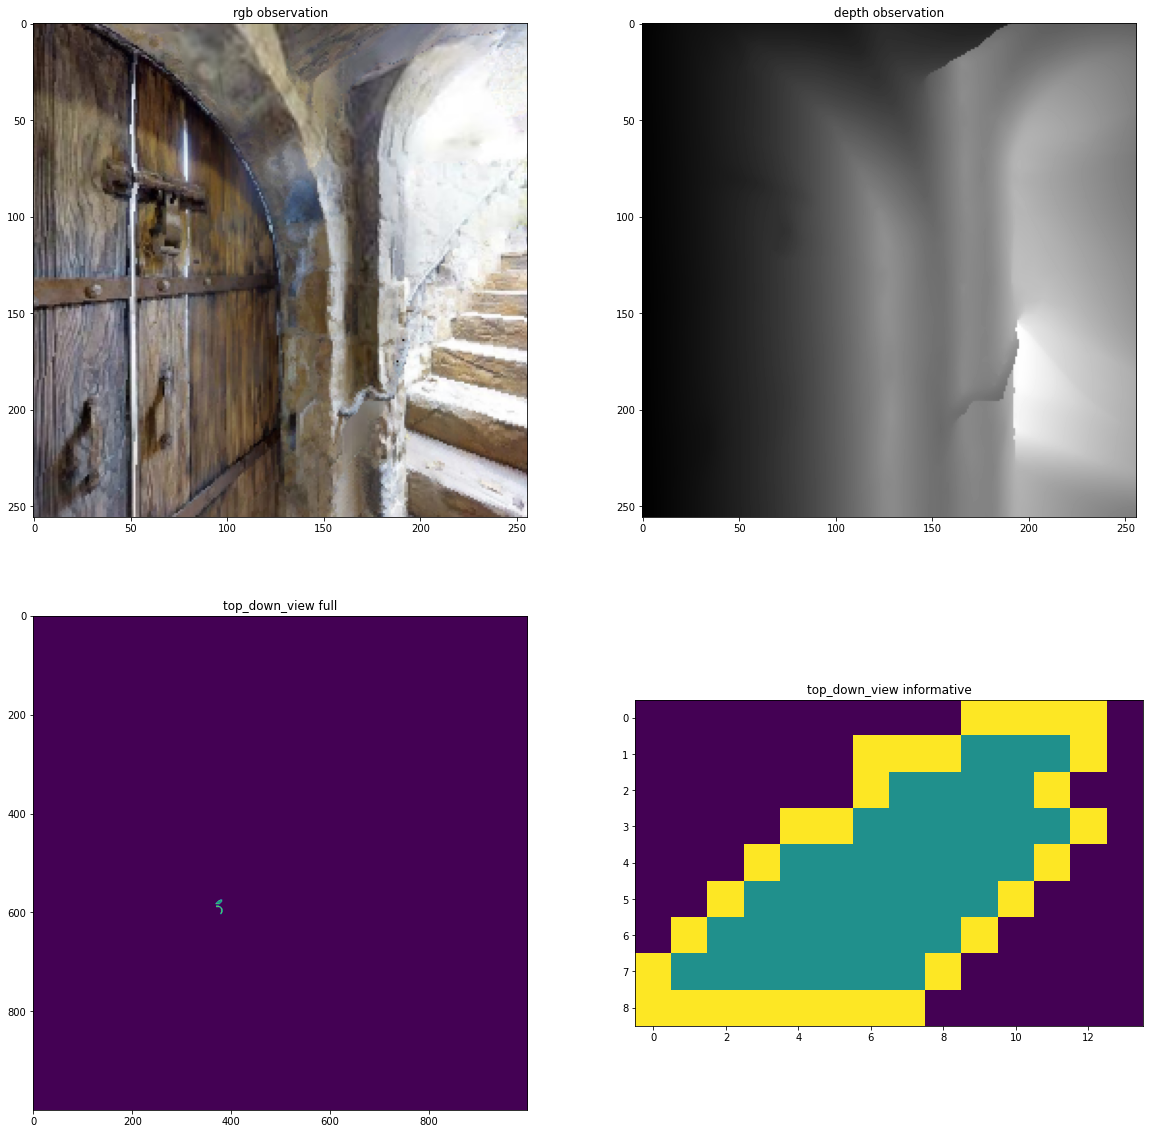

In [12]:
show_agent_info(env, 1000)

In [80]:
env.sim().action_space

Discrete(4)

Actions:

0 - stop (no move for this action)

1 - forward

2 - turn left

3 - turn right

AgentState(position=array([ 0.71729946,  0.17970331, -0.7067262 ], dtype=float32), rotation=quaternion(0.360440343618393, 0, -0.932782292366028, 0), velocity=array([0., 0., 0.]), angular_velocity=array([0., 0., 0.]), force=array([0., 0., 0.]), torque=array([0., 0., 0.]), sensor_states={'rgb': SixDOFPose(position=array([ 0.71729946,  1.4297034 , -0.7067262 ], dtype=float32), rotation=quaternion(0.360440343618393, 0, -0.932782292366028, 0)), 'depth': SixDOFPose(position=array([ 0.71729946,  1.4297034 , -0.7067262 ], dtype=float32), rotation=quaternion(0.360440343618393, 0, -0.932782292366028, 0))})


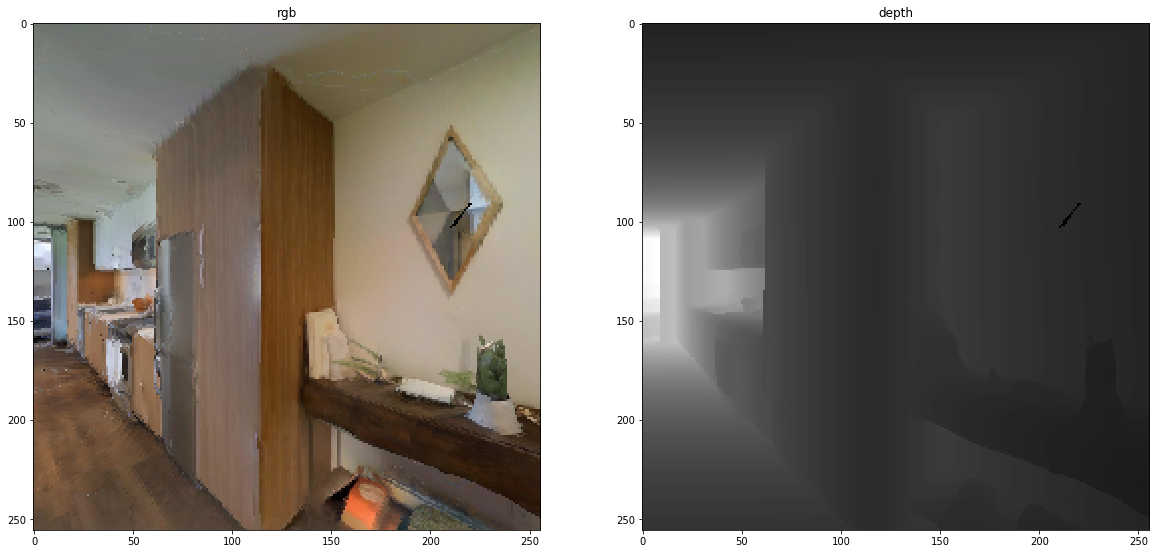

In [379]:
from IPython.display import clear_output
c = ''
actions = {'w':1, 'a':2, 'd':3}
while(True):
    c = input()
    if (c not in actions):
        break
    res = env.sim().step(action=actions[c])
    
    clear_output(True)
    print(env.sim().get_agent_state())
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    
    plt.subplot(1, 2, 1)
    plt.imshow(res['rgb'])
    plt.title('rgb')
    
    plt.subplot(1, 2, 2)
    plt.imshow(res['depth'][:,:,0], cmap='gray')
    plt.title('depth')
    
    plt.show()

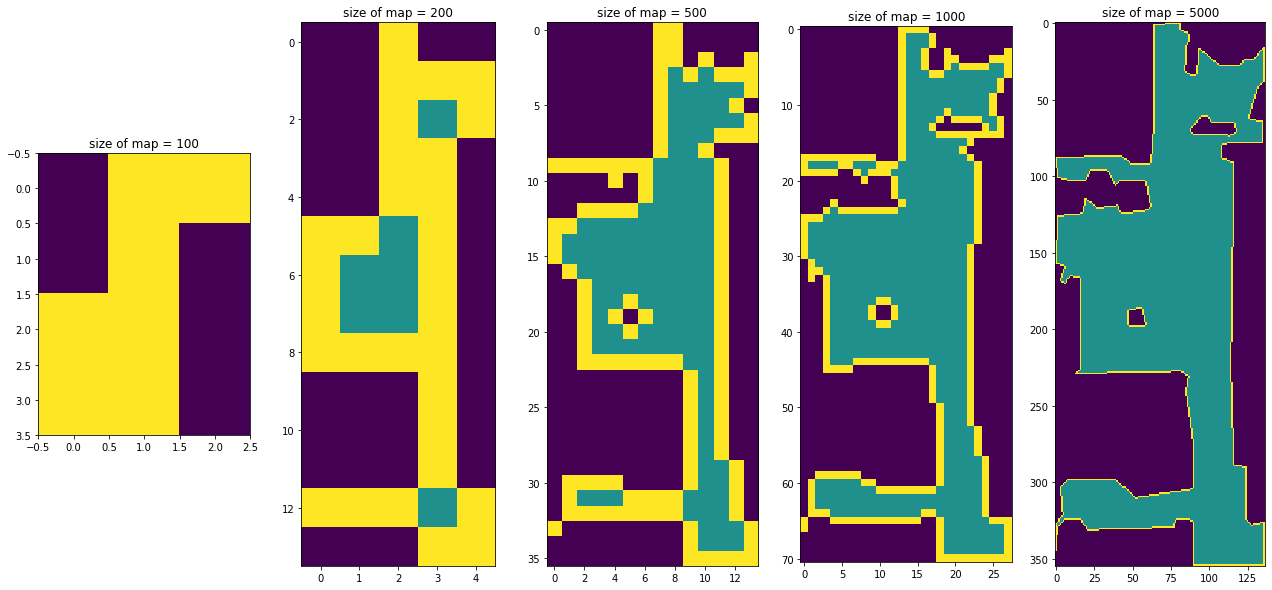

In [123]:
sizes = [100, 200, 500, 1000, 5000]
fig, ax = plt.subplots(1, len(sizes), figsize=(22, 10))
for i, size_of_map in enumerate(sizes):
    plt.subplot(1, len(sizes), i+1)
    top_down_map = maps.get_topdown_map(env.sim(), map_resolution=(size_of_map, size_of_map), draw_border=True)
    pos = get_informative_part(top_down_map)
    plt.imshow(top_down_map[pos[0]:pos[1], pos[2]:pos[3]])
    plt.title('size of map = {}'.format(size_of_map))
plt.show()

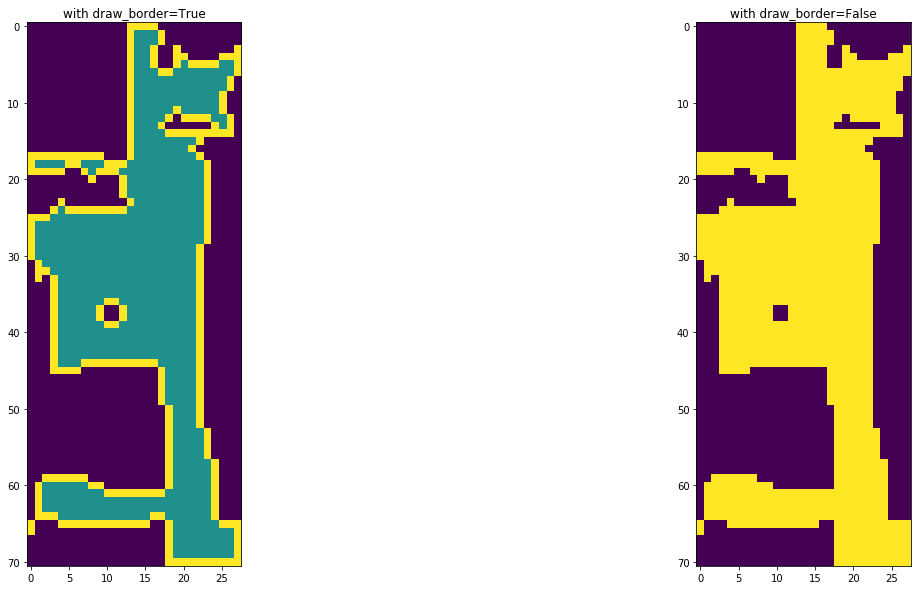

In [125]:
size_of_map = 1000
fig, ax = plt.subplots(1, 2, figsize=(22, 10))
plt.subplot(1, 2, 1)
top_down_map = maps.get_topdown_map(env.sim(), map_resolution=(size_of_map, size_of_map), draw_border=True)
pos = get_informative_part(top_down_map)
plt.imshow(top_down_map[pos[0]:pos[1], pos[2]:pos[3]])
plt.title('with draw_border=True')

plt.subplot(1, 2, 2)
top_down_map = maps.get_topdown_map(env.sim(), map_resolution=(size_of_map, size_of_map), draw_border=False)
pos = get_informative_part(top_down_map)
plt.imshow(top_down_map[pos[0]:pos[1], pos[2]:pos[3]])
plt.title('with draw_border=False')

plt.show()

In [308]:
# def depth2ptsCloud(depth):
def depth2ptsCloud(depth, cx, cy, fx, fy):
    h, w = depth.shape
    x = np.linspace(0, w - 1, w)
    y = np.linspace(0, h - 1, h)
    xv, yv = np.meshgrid(x[::-1], y)
    xv = xv.reshape((-1))
    yv = yv.reshape((-1))
    dfl = depth.T.reshape((-1))
    # cx, cy = h/2, w/2
    return np.concatenate(((dfl*(xv - cx)/fx)[:,None], (dfl*(yv-cy)/fy)[:,None], dfl[:,None]), 1)  
    # --> slambased mapper, убирают искажения через фокус камеры, не до конца понимаю
    # return np.concatenate((xv[:,None], yv[:,None], dfl[:,None]), 1)

In [520]:
depth = env.sim().get_observations_at()['depth'][:,:,0]

In [521]:
from mpl_toolkits.mplot3d import Axes3D

def plt_ptsCloud(pts):
    fig = plt.figure()
    ax = Axes3D(fig)

    # y, z, x because of 3d matplotlib axes _x /y |z
    ax.scatter(pts[:,1], pts[:,2], pts[:,0], s=0.01)
    plt.show()

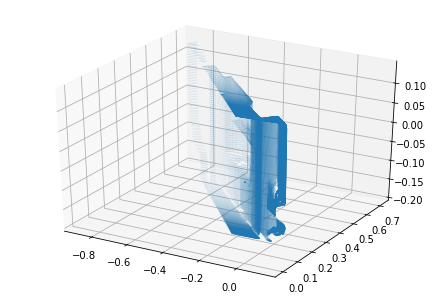

In [522]:
cx, cy = 127.5, 127.5
fx, fy = 100, 100
points = depth2ptsCloud(depth, cx, cy, fx, fy)

plt_ptsCloud(points)

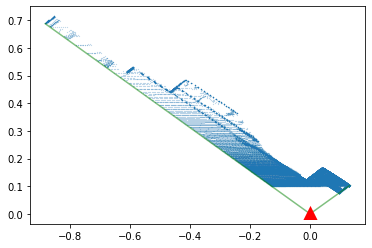

In [565]:
plt.scatter(points[:,1], points[:,2],s=0.01)

s_ = 1000
x_ = np.linspace(np.min(points[:,1]), np.max(points[:,1]), s_)
plt.plot(x_[x_<0], -0.78*x_[x_<0], 'g', alpha=0.5)
plt.plot(x_[x_>0], 0.78*x_[x_>0], 'g', alpha=0.5)
plt.plot(0, 0, 'r^', mew=5)

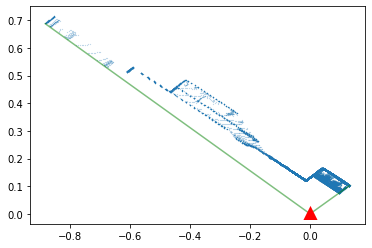

In [566]:
len_z = max(points[:,0]) - min(points[:,0])
# pts_x = sorted(points[:,0])
points_tdv = points[(points[:,0] > min(points[:,0]) + 0.1*len_z) * (points[:,0] < max(points[:,0]) - 0.1*len_z)][:,1:]
# points_tdv = points[points[:,0]>pts_x[round(0.1*len(pts_x))]]
# points_tdv = points_tdv[points_tdv[:,0]<pts_x[round(0.9*len(pts_x))]]
plt.scatter(points_tdv[:,0], points_tdv[:,1], s=0.01)

plt.plot(x_[x_<0], -0.78*x_[x_<0], 'g', alpha=0.5)
plt.plot(x_[x_>0], 0.78*x_[x_>0], 'g', alpha=0.5)
plt.plot(0, 0, 'r^', mew=5)

map size = (1015; 716)
cell size = 0.001


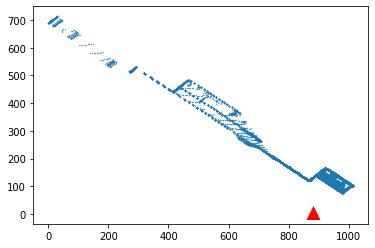

In [723]:
cell_size = 0.001
map_size_x = ((max(points_tdv[:,0]) - min(points_tdv[:,0])) // cell_size).astype(np.int) + 2
map_size_y = ((max(points_tdv[:,1]) - min(points_tdv[:,1])) // cell_size).astype(np.int) + 2
points_local_map = (points_tdv // cell_size).astype(np.int)
zero_pos = (-min(points_local_map[:,0]))
points_local_map[:,0] += zero_pos
print('map size = ({}; {})\ncell size = {}'.format(map_size_x, map_size_y, cell_size))
plt.scatter(points_local_map[:,0], points_local_map[:,1], s=cell_size*100)

plt.plot(zero_pos, 0, 'r^', mew=5)
plt.show()

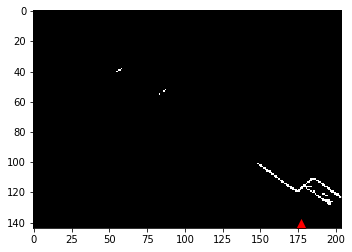

In [703]:
threshold = cell_size * 10000
local_map = np.zeros((map_size_y, map_size_x))
for point in points_local_map:
    local_map[map_size_y-point[1]-1, point[0]] += 1
local_map = (local_map > threshold)
plt.imshow(local_map, cmap='gray')

plt.plot(zero_pos, map_size_y-1, 'r^', mew=5)
plt.show()

In [539]:
res = env.sim().reset()

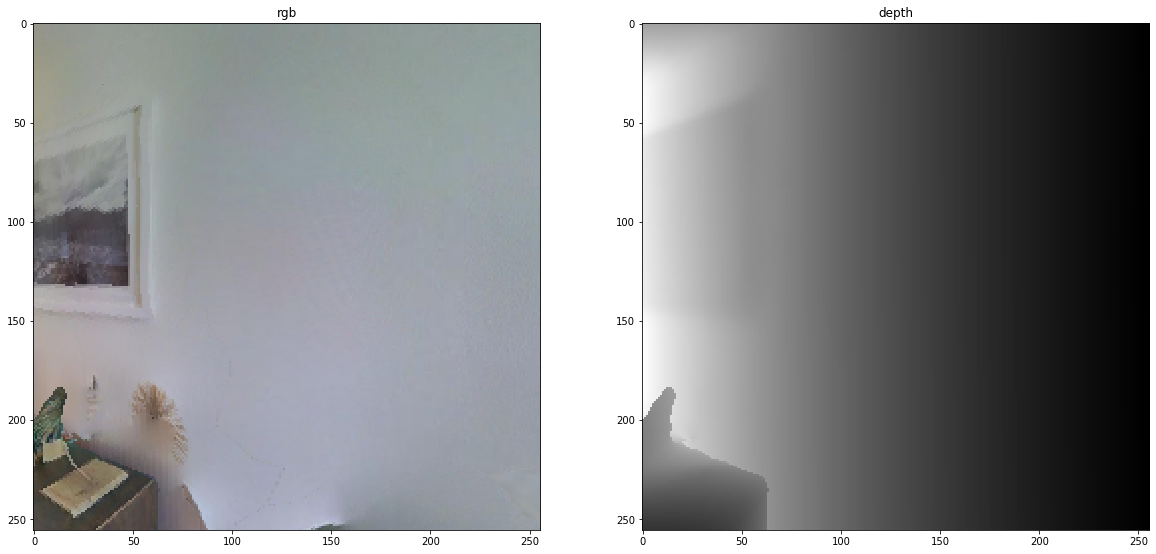

In [575]:
show_obs(env)

In [662]:
from quaternion import quaternion as quat
from math import acos

env.sim().get_agent_state()
# .position : x, hight, y  <-- np array
# .rotation : .a (complex: .real, .imag), .x (float), .y(float), .z(float) <--  quaternion.quaternion

# ~ 1/18 pi per rotation (36 - full circle)

AgentState(position=array([ 5.7194715 ,  0.17970331, -2.9783978 ], dtype=float32), rotation=quaternion(0.981201469898224, 0, 0.192986384034157, 0), velocity=array([0., 0., 0.]), angular_velocity=array([0., 0., 0.]), force=array([0., 0., 0.]), torque=array([0., 0., 0.]), sensor_states={'rgb': SixDOFPose(position=array([ 5.7194715,  1.4297034, -2.9783978], dtype=float32), rotation=quaternion(0.981201469898224, 0, 0.192986384034157, 0)), 'depth': SixDOFPose(position=array([ 5.7194715,  1.4297034, -2.9783978], dtype=float32), rotation=quaternion(0.981201469898224, 0, 0.192986384034157, 0))})

In [663]:
def q_to_axisangle(q):
    # from quaternion to vector of rotation and angle of rotation
    w, v = q.a.real, (q.x, q.y, q.z)
    theta = acos(w) * 2.0
    return v, theta

In [738]:
def state():
    st = env.sim().get_agent_state()
    _, angle = q_to_axisangle(st.rotation)
    return {'pos' : st.position, 'rot' : st.rotation, 'ang' : angle}

In [691]:
res = env.sim().reset()

_, theta_0 = q_to_axisangle(state()['rot'])
angles = [theta_0]
while(True):
    env.sim().step(2)
    _, theta_1 = q_to_axisangle(state()['rot'])
    if (theta_1 < theta_0):
        break
    angles.append(theta_1)
    theta_0 = theta_1

In [693]:
len(angles) - 1

36

{'pos': array([ 5.729306  ,  0.17970331, -2.7285914 ], dtype=float32), 'rot': quaternion(0.999806463718414, 0, 0.0196734201163054, 0), 'ang': 0.03934895420447965}


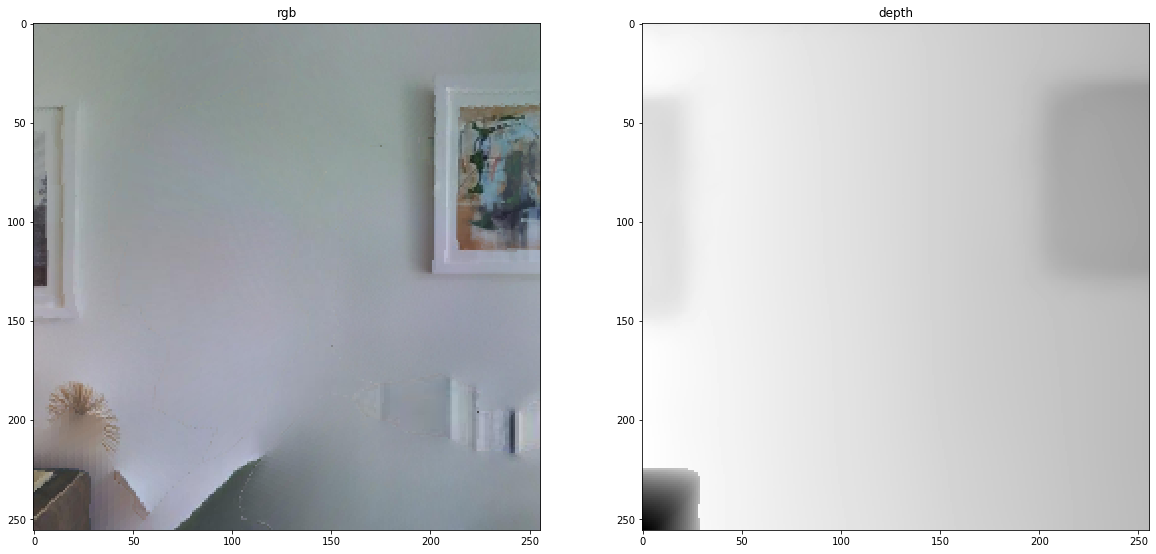

In [819]:
res = env.sim().reset()
print(state())
pos_0 = state()['pos']
show_obs(env)

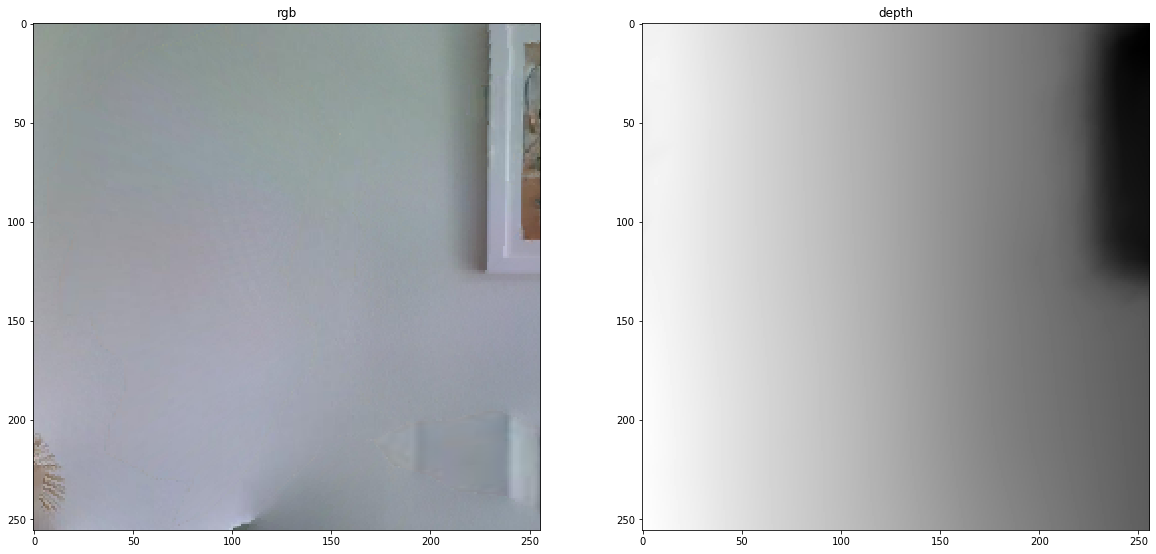

{'pos': array([ 5.7194715 ,  0.17970331, -2.9783978 ], dtype=float32), 'rot': quaternion(0.999806463718414, 0, 0.0196734201163054, 0), 'ang': 0.03934895420447965}


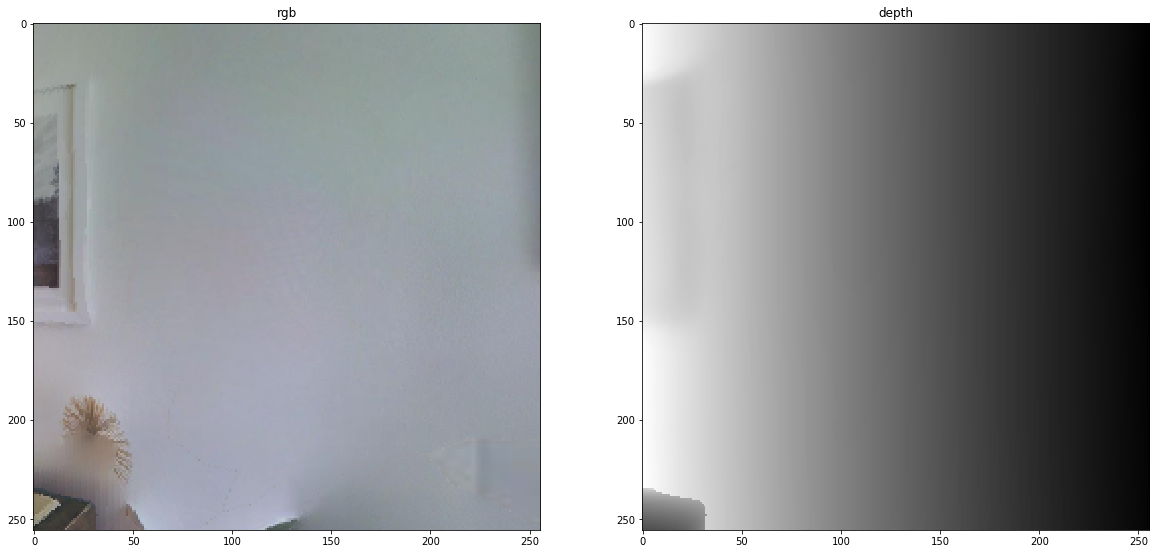

{'pos': array([ 5.7194715 ,  0.17970331, -2.9783978 ], dtype=float32), 'rot': quaternion(0.994287252426147, 0, 0.106737427413464, 0), 'ang': 0.21388211935958945}


In [820]:
res = env.sim().step(1)
show_obs(env)
print(state())
pos_1 = state()['pos']
ang_0 = state()['ang']
res = env.sim().step(2)
show_obs(env)
ang_1 = state()['ang']
print(state())

In [945]:
step_size = ((pos_1 - pos_0)**2).sum()
rot_size = ang_1 - ang_0
print('step size = {}\nrotation size = {}'.format(step_size, rot_size))

step size = 0.062499962747097015
rotation size = 0.1745331651551098


In [835]:
res = env.sim().reset()
angls = [state()['ang']]
for i in range(36):
    res = env.sim().step(2)
    angls.append(state()['ang'])
angls = np.array(angls)

In [836]:
(angls[1:] - angls[:-1]).sum() / (2 * np.pi)

0.9874748388657208

In [840]:
(angls[1:] - angls[:-1]) / (2*np.pi) * 360

array([10.00001375,  9.99999031, 10.00001127, 10.00000656, 10.00000355,
        9.99999369,  9.99999718,  9.99999613, 10.00000074, 10.00000033,
        9.99999209,  9.99999611,  9.99999956, 10.00000073, 10.00000545,
        9.99999856,  9.99999863,  9.9999994 , 10.00000007,  9.99999638,
       10.0000015 ,  9.99999957,  9.99999788,  9.99999033, 10.00000139,
       10.00000577,  9.99999258,  9.99998561, 10.00001768,  9.99997741,
       10.00001614, 10.00000042, 10.0000101 , 10.000033  , 10.00009626,
        5.49081585])

In [983]:
def ptsCloud2localMap(pts, cell_size=0.001):
    len_z = max(pts[:,0]) - min(pts[:,0])
    points_tdv = pts[(pts[:,0] > min(pts[:,0]) + 0.1*len_z) * (pts[:,0] < max(pts[:,0]) - 0.1*len_z)][:,1:]
    
    map_size_x = ((max(points_tdv[:,0]) - min(points_tdv[:,0])) // cell_size).astype(np.int) + 2
    # map_size_y = ((max(points_tdv[:,1]) - min(points_tdv[:,1])) // cell_size).astype(np.int) + 2
    map_size_y = (max(points_tdv[:,1]) // cell_size).astype(np.int) + 1
    points_local_map = (points_tdv // cell_size).astype(np.int)
    zero_pos = (-min(points_local_map[:,0]))
    points_local_map[:,0] += zero_pos
    
    threshold = cell_size * 10000
    local_map = np.zeros((map_size_y, map_size_x))
    for point in points_local_map:
        local_map[map_size_y-point[1]-1, point[0]] += 1
    local_map = (local_map > threshold)
    
    return (local_map, zero_pos)

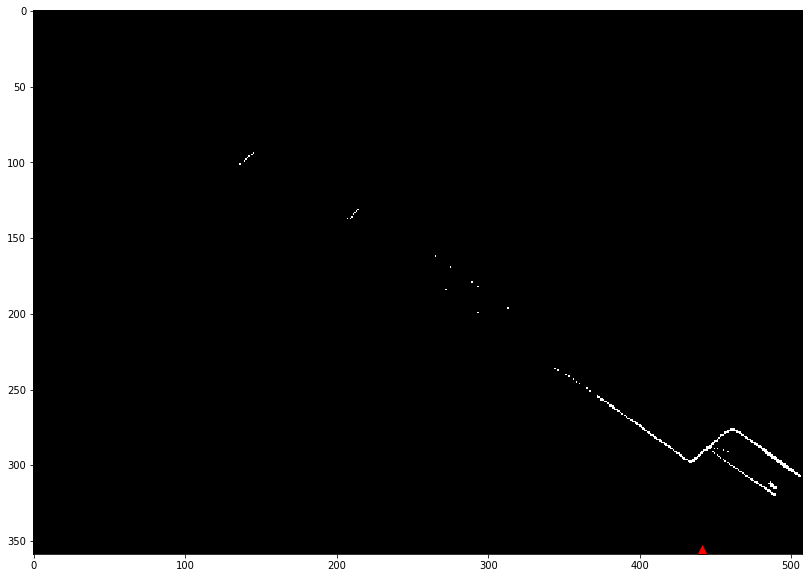

In [883]:
local_map, zero_pos = ptsCloud2localMap(points, 0.002)
fig, ax = plt.subplots(figsize=(22, 10))
# to view starting from k_h % of h and from k_w % of w
k_h, k_w = 0., 0.
plt.imshow(local_map[round(k_h*local_map.shape[0]):,round(k_w*local_map.shape[1]):], cmap='gray')
plt.plot(zero_pos - k_w*local_map.shape[1], (1-k_h)*local_map.shape[0]-1, 'r^', mew=5)

# plt.imshow(local_map, cmap='gray')
# plt.plot(zero_pos, local_map.shape[0]-1, 'r^', mew=5)

plt.show()

In [1127]:
def adopt_global_map(old_global_map, x, y, angle, local_map, zero_pos):
    sin, cos = np.sin(angle), np.cos(angle)
    map_size_is_ok = True
    left_adj, right_adj, top_adj, down_adj = 0, 0, 0, 0
    #for pt in [(0,0), (0,local_map.shape[1]-1), (local_map.shape[0]-1,0), (local_map.shape[0]-1, local_map.shape[1]-1)]:
    #    dh = local_map.shape[0] - 1 - pt[0]
    #    dw = zero_pos - pt[1]
    #    dy = round(-dh*cos + dw*sin)
    #    dx = round(-dh*sin - dw*cos)
    #    x_new = int(round(x+dx))
    #    y_new = int(round(y+dy))
    #    if (x_new < 0):
    #        left_adj = max(left_adj, -x_new)
    #    if (y_new < 0):
    #        top_adj = max(top_adj, -y_new)
    #    if (x_new >= old_global_map.shape[1]):
    #        right_adj = max(right_adj, x_new-old_global_map.shape[1]+1)
    #    if (y_new >= old_global_map.shape[0]):
    #        down_adj = max(down_adj, y_new-old_global_map.shape[0]+1)
    #    print('checked for {}: ({}, {})'.format(pt, x_new, y_new))
    
    pts = []
    # +delt вдоль h: y -= delt*cos, x -= delt*sin
    # +delt вдоль w: y += delt*sin, x -= delt*cos
    for i in range(local_map.shape[0]):
        for j in range(local_map.shape[1]):
            if local_map[i,j]:
                dh = local_map.shape[0] - 1 - i
                dw = zero_pos - j
                dy = round(-dh*cos + dw*sin)
                dx = round(-dh*sin - dw*cos)
                x_new = int(round(x+dx))
                y_new = int(round(y+dy))
                if (x_new < 0):
                    left_adj = max(left_adj, -x_new)
                if (y_new < 0):
                    top_adj = max(top_adj, -y_new)
                if (x_new >= old_global_map.shape[1]):
                    right_adj = max(right_adj, x_new-old_global_map.shape[1]+1)
                if (y_new >= old_global_map.shape[0]):
                    down_adj = max(down_adj, y_new-old_global_map.shape[0]+1)
                pts.append((y_new, x_new))
                
                # if (x_new >= 0) and (x_new < new_global_map.shape[1]) and (y_new >= 0) and (y_new < new_global_map.shape[0]):
                #     new_global_map[y_new, x_new] = 1
                # else:
                #     map_size_is_ok = False
                #     print('in point ({}, {}) - out of bounds\twhich is corresponds to local point ({}, {})'.format(y_new, x_new, i, j))
    
    new_global_map = np.zeros((old_global_map.shape[0] + top_adj + down_adj, old_global_map.shape[1] + right_adj + left_adj))
    new_global_map[top_adj : top_adj + old_global_map.shape[0], left_adj : left_adj + old_global_map.shape[1]] = old_global_map
    if new_global_map.shape != old_global_map.shape:
        print('map size changed left: {}, right: {}, top: {}, down: {}\nnew map size = {}'.format(left_adj, right_adj, top_adj, down_adj, new_global_map.shape))
    x_ = x + left_adj
    y_ = y + top_adj
    
    for pt in pts:
        new_global_map[pt[0]+top_adj, pt[1]+left_adj] = 1
    
    return new_global_map, x_, y_

In [877]:
half_angle_of_view = np.pi/2 - np.arctan(0.78)

In [878]:
half_angle_of_view

0.9083700329617453

In [931]:
def plot_agent_on_map(x, y, angle, map_sh, map_sw):
    plt.plot(x, y, 'ro', mew=3)
    
    ang1 = angle + half_angle_of_view
    while(ang1 < 0):
        ang1 += 2*np.pi
    while(ang1 >= 2*np.pi):
        ang1 -= 2*np.pi
    
    ang2 = angle - half_angle_of_view
    while(ang2 < 0):
        ang2 += 2*np.pi
    while(ang2 >= 2*np.pi):
        ang2 -= 2*np.pi
    
    a1, a2 = 1./np.tan(ang1), 1./np.tan(ang2)
    b1, b2 = y-a1*x, y-a2*x
    
    xx = np.arange(map_sw)
    yy1, yy2 = np.array([a1*x_+b1 for x_ in xx]), np.array([a2*x_+b2 for x_ in xx])
    xx1, xx2 = xx[(yy1>0)*(yy1<map_sh-1)], xx[(yy2>0)*(yy2<map_sh-1)]
    yy1, yy2 = yy1[(yy1>0)*(yy1<map_sh-1)], yy2[(yy2>0)*(yy2<map_sh-1)]
    
    if (ang1 <= np.pi):
        yy1 = yy1[xx1 <= x]
        xx1 = xx1[xx1 <= x]
    else:
        yy1 = yy1[xx1 >= x]
        xx1 = xx1[xx1 >= x]
    
    if (ang2 <= np.pi):
        yy2 = yy2[xx2 <= x]
        xx2 = xx2[xx2 <= x]
    else:
        yy2 = yy2[xx2 >= x]
        xx2 = xx2[xx2 >= x]
    
    plt.plot(xx1, yy1, 'g')
    plt.plot(xx2, yy2, 'g')

map size changed left: 0, right: 46, top: 0, down: 0
new map size = (1000, 1046)


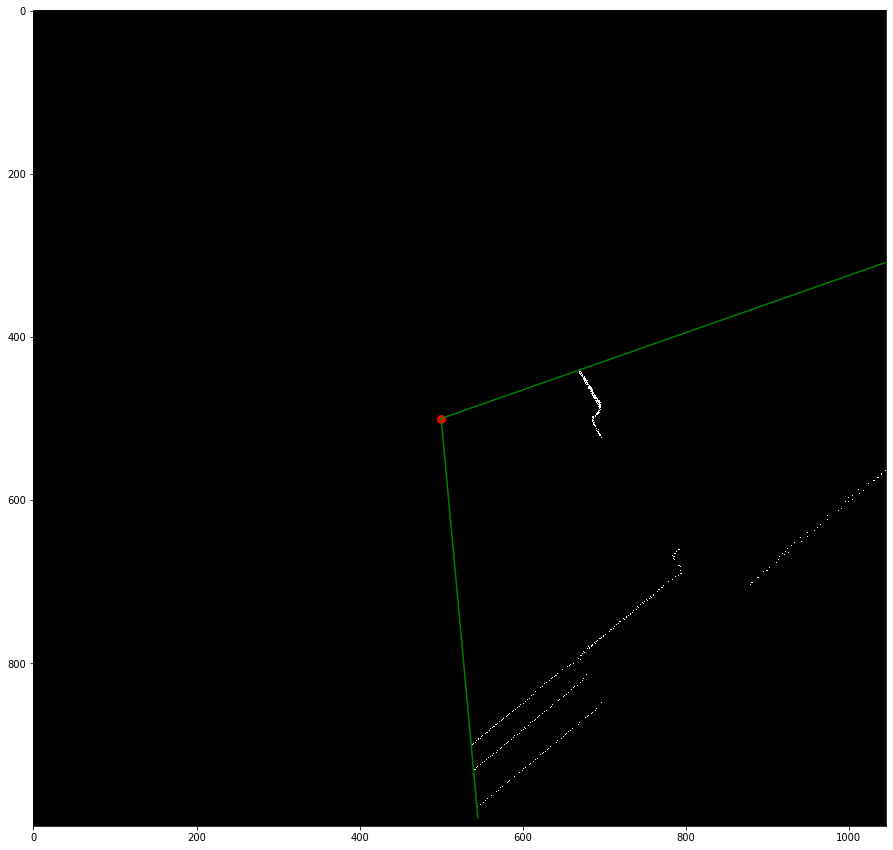

In [1132]:
global_map_ = np.zeros((1000, 1000))
x, y = 500, 500
angle = np.pi + 1

fig, ax = plt.subplots(figsize=(24, 15))

# h_from, h_to, w_from, w_to = 0, global_map_.shape[0], 0, global_map_.shape[1]
# h_from, h_to, w_from, w_to = 400, 800, 400, 650

global_map_, x, y = adopt_global_map(global_map_, x, y, angle, local_map, zero_pos) # [h_from:h_to,w_from:w_to]
plt.imshow(global_map_, cmap='gray')
# plt.imshow(adopt_global_map(global_map_, x, y, angle, local_map, zero_pos, 0.002), cmap='gray')

# plot_agent_on_map(x-w_from, y-h_from, angle, h_to-h_from, w_to-w_from)
plot_agent_on_map(x, y, angle, global_map_.shape[0], global_map_.shape[1])

plt.show()

In [1124]:
step_size = 0.25 * 0.1
rot_size = np.pi / 18

def tracking_position(x, y, ang, action, cell_size, step_size=step_size):
    if (action == 'w'):
        real_step_size = step_size/cell_size
        sin, cos = np.sin(ang), np.cos(ang)
        dx, dy = sin * real_step_size, cos * real_step_size
        return x-dx, y-dy, ang
    elif (action == 'a'):
        return x, y, ang+rot_size
    elif (action == 'd'):
        return x, y, ang-rot_size

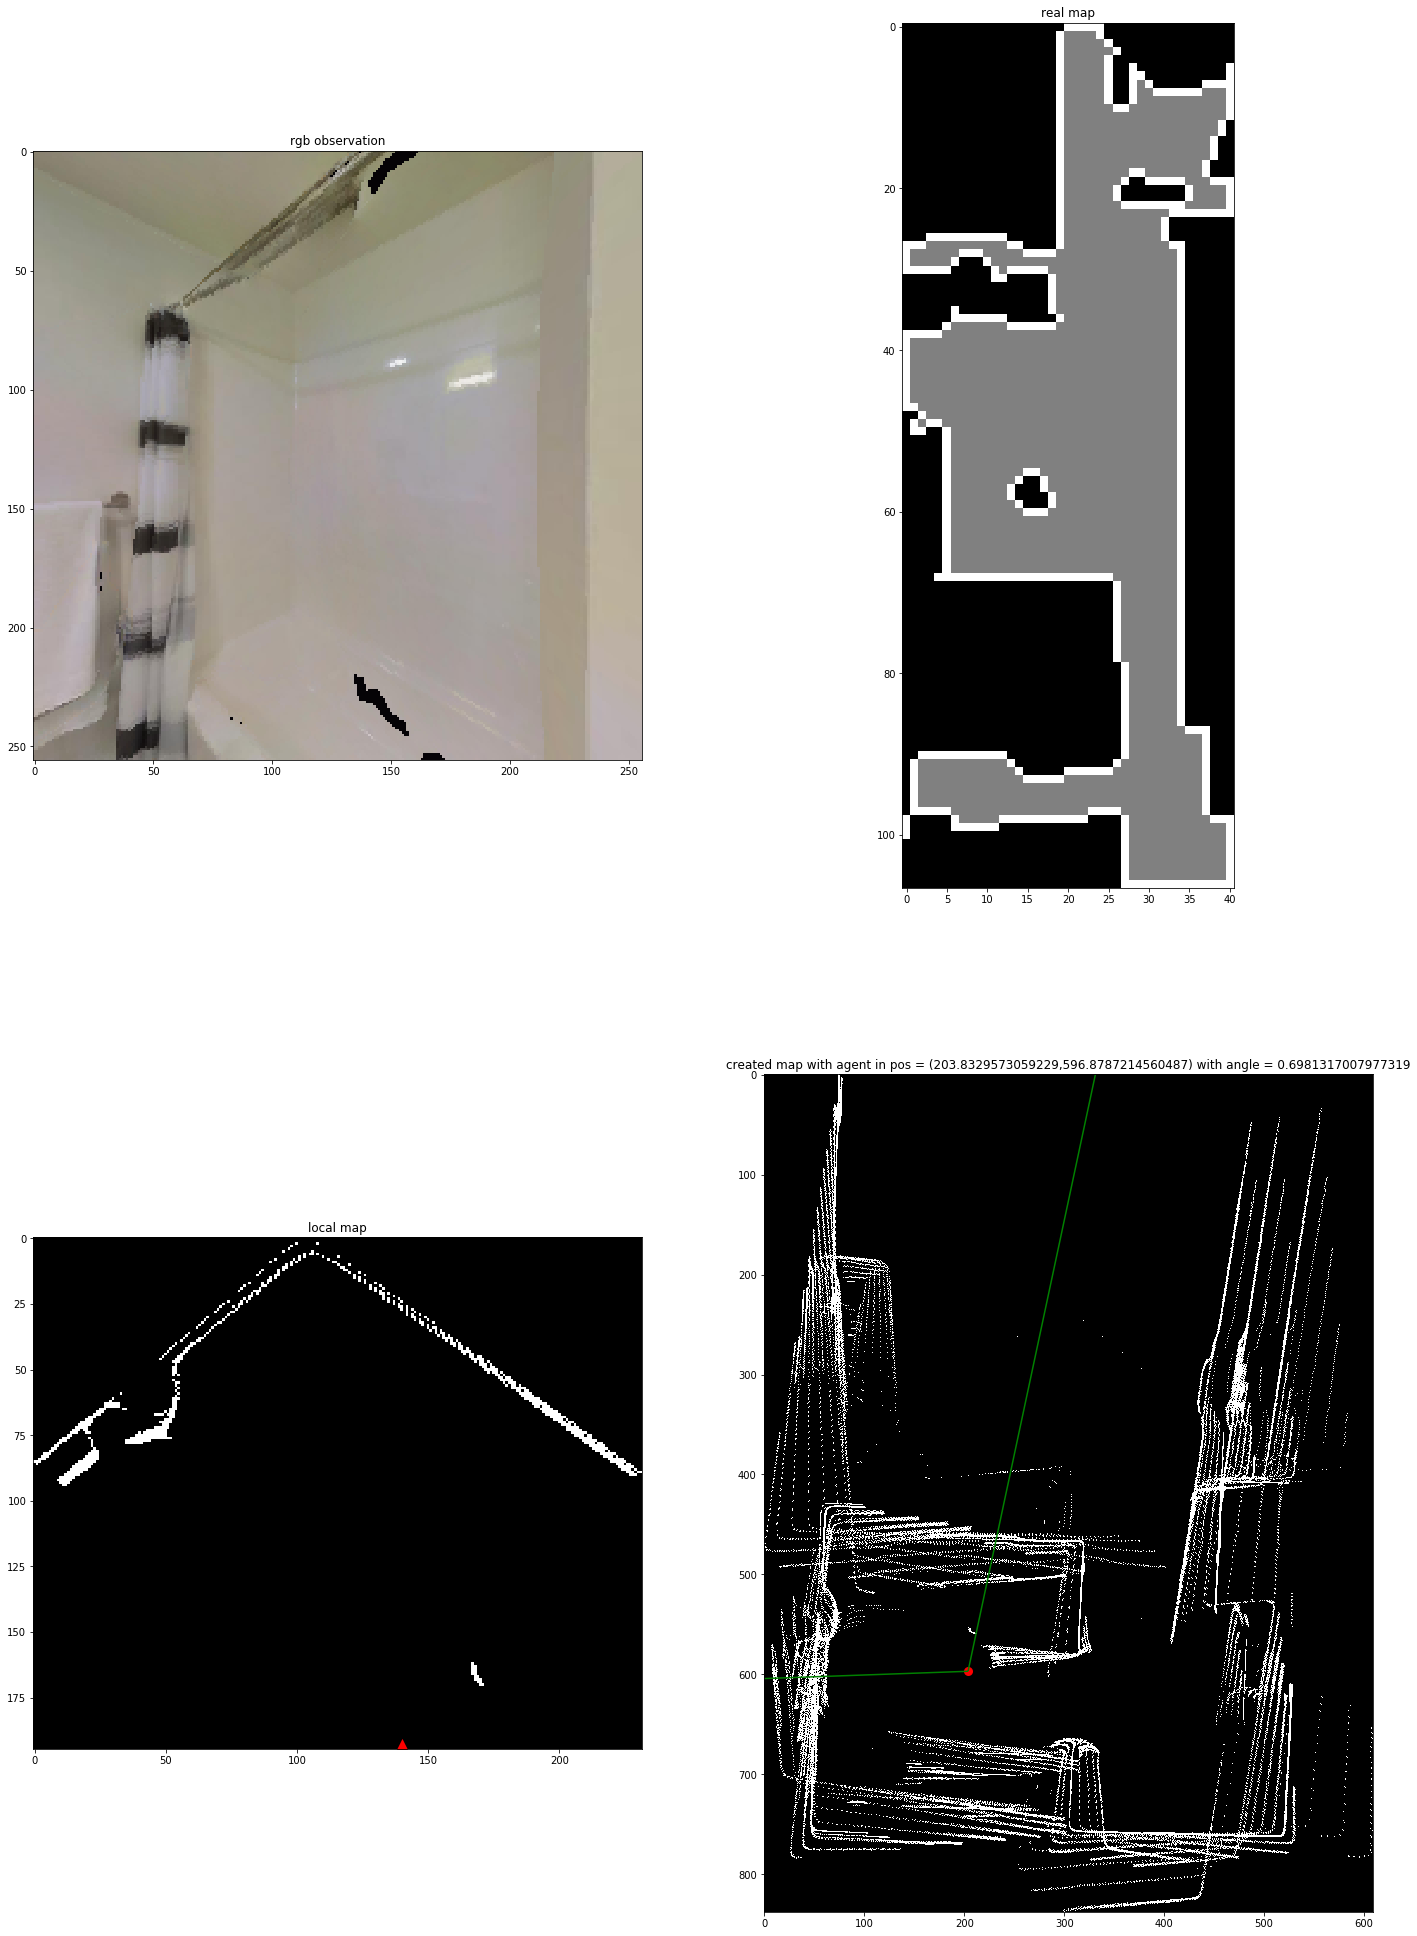

 f


In [1133]:
res = env.sim().reset()
# fig, ax = plt.subplots(figsize=(20, 12))
# plt.imshow(res['rgb'])
# plt.show()

# константы для Depth to Points cloud
cx, cy = 127.5, 127.5
fx, fy = 100, 100

# size_of_map = 1500
global_map = np.zeros((10, 10))
cell_size = 0.001
# x, y, ang = size_of_map//2, size_of_map//2, 0
x, y, ang = 0, 0, np.pi/2

top_down_map = maps.get_topdown_map(env.sim(), map_resolution=(size_of_map, size_of_map), draw_border=True)
pos = get_informative_part(top_down_map)
top_down_map = top_down_map[pos[0]:pos[1], pos[2]:pos[3]]


c = ''
actions = {'w':1, 'a':2, 'd':3}
while(True):    
    fig, ax = plt.subplots(2, 2, figsize=(24, 35))
    
    
    # rgb view
    plt.subplot(2, 2, 1)
    plt.imshow(res['rgb'])
    plt.title('rgb observation')
    
    
    # local map
    points = depth2ptsCloud(res['depth'][:,:,0], cx, cy, fx, fy)
    local_map, zero_pos = ptsCloud2localMap(points, cell_size)
    
    plt.subplot(2, 2, 3)
    plt.imshow(local_map, cmap='gray')
    plt.plot(zero_pos, local_map.shape[0]-1, 'r^', mew=5)
    plt.title('local map')
    
    
    
    # full real map
    plt.subplot(2, 2, 2)
    plt.imshow(top_down_map, cmap='gray')
    plt.title('real map')
    
    
    # evaluated map
    global_map, x, y = adopt_global_map(global_map, x, y, ang, local_map, zero_pos)
    
    plt.subplot(2, 2, 4)
    plt.imshow(global_map, cmap='gray')
    plot_agent_on_map(x, y, ang, global_map.shape[0], global_map.shape[1])
    plt.title('created map with agent in pos = ({},{}) with angle = {}'.format(x, y, ang))
    
    
    plt.show()
    
    c = input()
    if (c not in actions):
        break
    res = env.sim().step(action=actions[c])
    
    x, y, ang = tracking_position(x, y, ang, c, cell_size)
    
    clear_output(True)